### Q.1. RA and Dec that is published is usually for the epoch of 2000, called J2000. Do you think the RA and Dec would change today? Use astropy to find the RA and Dec of a radio source – Cygnus - A (RA 19h 59m 28.3566s  , Dec +40° 44′ 02.096″)

Ans. The J2000 catalog tells us the RA and Dec of celestical objets as of 1st January 2000. However,the RA and Dec of celestiacl objects change slowly over the years due to the wobble in Earth's axial tilt and the proper motion of the stars. Therefore it is expected that the RA and Dec today (as of January 2026) would be slightly different as compared to J2000. 

In [1]:
## Finding the Ra and Dec coordinates of Cygnus - A
from astropy.coordinates import SkyCoord as sk

#creating a SkyCoord object to hold the ra and da info. of Cygnus A
cygnus_a = sk.from_name("Cygnus A")

#extracting the RA and Dec info
r, d = cygnus_a.ra, cygnus_a.dec

#printing the data in suitable format
print(f"Cygnus - A (RA: {r.hms.h:f} h {r.hms.m: f} min {r.hms.s: f} s, Dec: +{d.dms.d:f} degree {d.dms.m:f}' {d.dms.s: f}'') ")

Cygnus - A (RA: 19.000000 h  59.000000 min  28.356568 s, Dec: +40.000000 degree 44.000000'  2.097233'') 


### Q.2. What will be this source’s azimuth and elevation when observing from IIT Kanpur?



Ans. To convert the RA and Dec of Cygnus - A, we need the location and time information. The latitude and longitude of IIT Kanpur is as follows; lat = 26.514738, long = 80.233248. Let the observation time be 15th January 2026 7pm IST (1:30 pm UTC)

In [2]:
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import EarthLocation, AltAz

#creating a time instance 
t = Time("2026-01-15 13:30:00", scale = 'utc')

#creating a location instance for IIT Kanpur
iitk = EarthLocation(lat = 26.5147*u.deg, lon = 80.2332*u.deg)

#creating an AltAz instance 
altaz_frame = AltAz(obstime = t, location = iitk)

#extracting the transformed coordinate info.
new_coord = cygnus_a.transform_to(altaz_frame)

#printing the results in appropriate format
altitude = new_coord.alt
azimuth = new_coord.az

print(f"Cygnus - A (Alt, Az) = ({altitude :.2f}, {azimuth :.2f}), as on 15-01-2026 13:30:00 utc")


Cygnus - A (Alt, Az) = (11.62 deg, 310.01 deg), as on 15-01-2026 13:30:00 utc


### Q.3.  Show in a polar plot, how the azimuth and elevation of this source would change when observing at IITK.

Ans. let us observe the change of altitude and azimuth of the source from utc 00:00:00 on 15th January 2026 till the source is above horizon

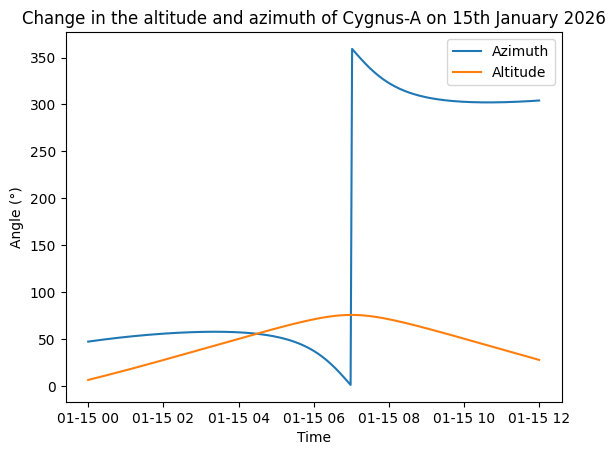

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

#creating the time steps of observation
tme = Time("2026-01-15 00:00:00", scale = 'utc') + np.linspace(0, 12, 300)*u.hour

#creating a new altaz frame 
a_frame = AltAz(obstime = tme, location = iitk)

#getting back the altaz list 
coord = cygnus_a.transform_to(a_frame)

#refining the output into aappropriate units
alt = coord.alt.to(u.deg).value
az = coord.az.to(u.deg).value


#creating the plot
plt.title("Change in the altitude and azimuth of Cygnus-A on 15th January 2026")
plt.xlabel("Time")
plt.ylabel("Angle (°)")
plt.plot(tme.datetime, az , label = "Azimuth")
plt.plot(tme.datetime, alt, label = "Altitude")
plt.legend()
plt.show()

### Q.4.  Plot how Sun’s RA and Dec changes over a year. Compare this with respect to that of Cygnus over a year?

Ans. Let us track the RA and Dec of the Sun on the 1st day of every month for 12 months in the year 2026

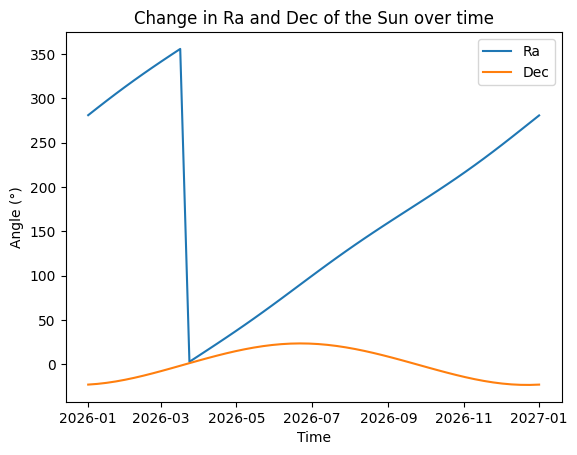

In [7]:
from astropy.coordinates import get_sun

#creating the array of months using the Time objects 
time = Time("2026-01-01", scale = "utc") + np.linspace(0, 365)*u.day

#getting the Ra and Dec of sun 
sun_coord = get_sun(time)

#extracting the data 
ra = sun_coord.ra.to(u.deg).value
dec = sun_coord.dec.to(u.deg).value

#plotting the ra 
plt.title("Change in Ra and Dec of the Sun over time")
plt.xlabel("Time")
plt.ylabel("Angle (°)")
plt.plot(time.datetime, ra, label = "Ra")
plt.plot(time.datetime, dec, label = "Dec")
plt.legend()
plt.show()

It can be seen that the change in the Ra and Dec of the Sun over a period of one year is somewhat similar to the change in the Alt and Az coordinates of Cygnus-A over a period of 12 hour.